In [1]:
import pandas as pd
import numpy as np

### There are three ways to evaluate Scikit-Learn Models:
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

In [4]:
heart_disease = pd.read_csv("../Data/heart-disease.csv")

In [6]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
np.random.seed(42)

X = heart_disease.drop(columns='target')
y = heart_disease['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

### 1. The Score() method

In [17]:
print(f"The training score is: {model.score(X_train, y_train)}")
print(f"The test score is: {model.score(X_test, y_test)}")

The training score is: 1.0
The test score is: 0.8241758241758241


### 2. The scoring parameter (cross validation)

In [18]:
from sklearn.model_selection import cross_val_score

print(f"Cross_val score: {cross_val_score(model, X, y)}")

# The cross value score trains the model five times in five different train/test splits and evaluates the score for each split. 

Cross_val score: [0.83606557 0.90163934 0.78688525 0.81666667 0.81666667]


### 3. Problem specific evaluations: accuracy, area under ROC curve, confusion matrix, classification report.
* ROC curves are a comparison of a model's true positive rate (tpr) vs. a model's false positive rate (fpr).
* True positive: Model predicts 1 when the truth is 1.
* False positive: Model predicts 1 when the truth is 0. 
* True negative: Model predicts 0 when truth is 0.
* False negative: Model predicts 0 when truth is 1. 

In [22]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.91, 0.09],
       [0.42, 0.58],
       [0.43, 0.57],
       [0.93, 0.07],
       [0.26, 0.74],
       [0.19, 0.81],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.51, 0.49]])

In [21]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.09, 0.58, 0.57, 0.07, 0.74, 0.81, 0.75, 0.04, 0.05, 0.49])

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [24]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02439024,
       0.02439024, 0.04878049, 0.04878049, 0.04878049, 0.04878049,
       0.04878049, 0.07317073, 0.09756098, 0.09756098, 0.09756098,
       0.14634146, 0.17073171, 0.17073171, 0.19512195, 0.19512195,
       0.2195122 , 0.2195122 , 0.24390244, 0.24390244, 0.26829268,
       0.26829268, 0.34146341, 0.3902439 , 0.3902439 , 0.43902439,
       0.51219512, 0.53658537, 0.63414634, 0.70731707, 0.75609756,
       0.80487805, 0.95121951, 1.        ])

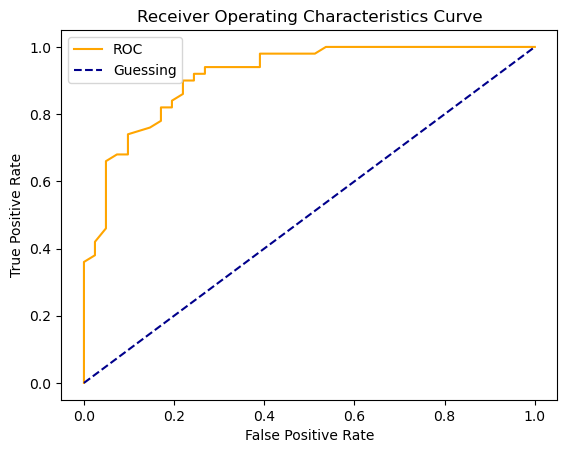

In [28]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of model. 
    """
    plt.plot(fpr,tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9148780487804877